# OpenCV with Python Intro and loading Images tutorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
 
while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.putText(frame, "640x480", (500, 475), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1)
   # cv2.line(frame, (0, 0), (640, 480), (255, 0, 0), 5)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.waitKey(0)
cv2.destroyAllWindows()



In [3]:
px = frame[100,100]
print(px)
frame[100,100] = [255,255,255]
print(px)

[18 17  7]
[255 255 255]


In [4]:
px = frame[100:150,100:150]
print(px)

[[[255 255 255]
  [ 17  17   7]
  [ 17  17   7]
  ...
  [ 15  16   7]
  [ 13  15   6]
  [ 14  15   6]]

 [[ 17  17   8]
  [ 17  17   8]
  [ 15  16   7]
  ...
  [ 15  15   8]
  [ 15  15   8]
  [ 14  14   7]]

 [[ 15  16   7]
  [ 15  16   7]
  [ 15  15   8]
  ...
  [ 17  16   9]
  [ 16  15   8]
  [ 15  14   8]]

 ...

 [[ 10  10   9]
  [ 10  10   9]
  [ 10  10   9]
  ...
  [  9  12  14]
  [ 10  12  13]
  [ 10  13  12]]

 [[ 11  11  11]
  [ 10  10  10]
  [ 11  11  11]
  ...
  [  9  11  14]
  [ 10  11  14]
  [ 10  12  14]]

 [[ 11  11  12]
  [ 11  11  11]
  [ 11  11  11]
  ...
  [  9  11  15]
  [ 10  11  16]
  [ 10  11  15]]]


In [5]:
frame[100:150,100:150] = [255,255,255]
print(frame.shape)
print(frame.size)
print(frame.dtype)

(480, 640, 3)
921600
uint8


In [6]:
watch_face = frame[450:480,500:640]
frame[190:220,300:440] = watch_face
cv2.imshow('image',frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
import cv2

cap1 = cv2.VideoCapture(0)
ret, frame = cap1.read()
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc,20.0,(640,480))
out.write(frame)
cap1.release()


cap2 = cv2.VideoCapture(0)
ret2, frame2 = cap2.read()

fourcc2 = cv2.VideoWriter_fourcc(*'XVID')
out2 = cv2.VideoWriter('output2.avi',fourcc2,20.0,(640,480))
out2.write(frame)
cap2.release()

cv2.imshow('image',frame)
cv2.imshow('image2',frame2)



cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray1 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
add = gray + gray1

cv2.imshow('add',add)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
weighted = cv2.addWeighted(frame,0.6,frame2,0.4,0)
cv2.imshow('weighted',weighted)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
img = cv2.imread("bookpage.jpg")
retval, threshold = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)
cv2.imshow('threshold',threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [ ]:
grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval2, threshold2 = cv2.threshold(grayscaled, 9, 255, cv2.THRESH_BINARY)
cv2.imshow('original',img)
cv2.imshow('threshold2',threshold2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
th = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow('original',img)
cv2.imshow('Adaptive threshold',th)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
retval2,threshold2 = cv2.threshold(grayscaled,200,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('original',img)
cv2.imshow('Otsu threshold',threshold2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([0,0,0])
    upper_red = np.array([255,255,255])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    k = cv2.waitKey(5) & 0xFF == ord('q')
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

In [ ]:
cap = cv2.VideoCapture(0)
new_width = 240
new_height = 160

while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_red = np.array([0,0,0])
    upper_red = np.array([255,180,255])

    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    kernel = np.ones((15,15),np.float32)/225
    smoothed = cv2.filter2D(res,-1,kernel)
    blur = cv2.GaussianBlur(res,(15,15),0)
    median = cv2.medianBlur(res,15)
    bilateral = cv2.bilateralFilter(res,15,75,75)

    bilateral_resized = cv2.resize(bilateral, (new_width, new_height))
    res_resized = cv2.resize(res, (new_width, new_height))
    smoothed_resized = cv2.resize(smoothed, (new_width, new_height))
    blur_resized = cv2.resize(blur, (new_width, new_height))
    median_resized = cv2.resize(median, (new_width, new_height)) 
    combined = np.hstack([smoothed_resized,blur_resized,median_resized,res_resized,bilateral_resized, mask_resized])
    cv2.imshow('smoothed, blur, median, res and bilateral',combined)

    k = cv2.waitKey(5) & 0xFF == ord('q')
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

NameError: name 'mask_resized' is not defined

In [ ]:
cap = cv2.VideoCapture(0)
new_height = 160
new_width = 240

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])

    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(mask,kernel,iterations = 1)
    dilation = cv2.dilate(mask,kernel,iterations = 1)
    mask_resized = cv2.resize(mask, (new_width, new_height))
    kernel_resized = cv2.resize(kernel, (new_width, new_height))
    dilation_resized = cv2.resize(dilation, (new_width, new_height))
    erosion_resized = cv2.resize(erosion, (new_width, new_height))
    combined = np.hstack([kernel_resized,erosion_resized,dilation_resized, mask_resized])

    cv2.imshow('kernel, erosion, dilation and mask',combined)

    k = cv2.waitKey(5) & 0xFF == ord('q')
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

In [ ]:
cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_red = np.array([10,10,10])
    upper_red = np.array([255,255,180])

    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    kernel = np.ones((5,5),np.uint8)

    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    mask_resized = cv2.resize(mask, (new_width, new_height))
    kernel_resized = cv2.resize(kernel, (new_width, new_height))
    opening_resized = cv2.resize(opening, (new_width, new_height))
    closing_resized = cv2.resize(closing, (new_width, new_height))

    combined = np.hstack([kernel_resized,opening_resized,closing_resized, mask_resized])


    cv2.imshow('mask, kernel, opening and closing',combined)

    k = cv2.waitKey(5) & 0xFF == ord('q')
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

In [ ]:
cap = cv2.VideoCapture(0)
new_height = 240
new_width =320


while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_red = np.array([10,10,10])
    upper_red = np.array([255,255,180])

    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    laplacian = cv2.Laplacian(frame,cv2.CV_64F)
    sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)

    
    laplacian_resized = cv2.resize(laplacian, (new_width, new_height))
    sobelx_resized = cv2.resize(sobelx, (new_width, new_height))
    sobely_resized = cv2.resize(sobely, (new_width, new_height))

    combined = np.hstack([laplacian_resized,sobelx_resized,sobely_resized])

    cv2.imshow('laplacian, sobelx, sobely and mask',combined)
  
    k = cv2.waitKey(5) & 0xFF == ord('q')
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

In [ ]:
cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_red = np.array([10,10,10])
    upper_red = np.array([255,255,180])

    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('Original',frame)
    edges = cv2.Canny(frame,100,200)
    cv2.imshow('Edges',edges)

    cv2.imshow('mask and edges',combined)

    k = cv2.waitKey(5) & 0xFF == ord('q')
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows() 
cap.release()


# Basic object recognition

In [ ]:
import cv2 
import numpy as np

original_img_rgb = cv2.imread('whatever.jpg')

img_gray = cv2.cvtColor(original_img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('opencv-template-for-matching.jpg',0)

w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.7
loc = np.where( res >= threshold)
img_rgb = original_img_rgb.copy()

for pt in zip(*loc[::-1]):
   
    score = res[pt[1],pt[0]]
    
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
    cv2.putText(img_rgb, f'{score:.2f}', (pt[0], pt[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 1)

cv2.imshow('Detected',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

# foreground extraction

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = frame
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (160, 120,350,290)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,10,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()




In [ ]:
img = cv2.imread("corners.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 20)
corners = np.int0(corners)

for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)

cv2.imshow('Corners', img)

cv2.waitKey(0)
cv2.destroyAllWindows()



C:\Users\admin\AppData\Local\Temp\ipykernel_11656\1787064722.py:7: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


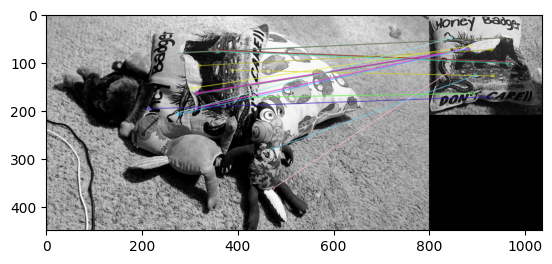

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('pillow.jpg', 0)
template = cv2.imread('template2.jpg', 0)

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img, None)
kp2, des2 = orb.detectAndCompute(template, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img, kp1, template, kp2, matches[:20], None, flags=2)
plt.imshow(img3)
plt.show()



In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    cv2.imshow('fgmask',fgmask)
    cv2.imshow('frame',frame)
    
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



# face detection 

In [ ]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
       
        corners_faces = cv2.goodFeaturesToTrack(roi_gray, 200, 0.1, 20)
        if corners_faces is not None:
            corners_faces = np.int0(corners_faces)
            for corner in corners_faces:
                x, y = corner.ravel()
                cv2.circle(roi_color, (x, y), 3, 255, -1)

        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
            corners_eyes = cv2.goodFeaturesToTrack(roi_gray, 100, 0.01, 10)
            if corners_eyes is not None:
                corners_eyes = np.int0(corners_eyes)
                for corner in corners_eyes:
                    x, y = corner.ravel()
                    cv2.circle(roi_color, (x, y), 3, 255, -1)
 
    cv2.imshow('img',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

C:\Users\admin\AppData\Local\Temp\ipykernel_11656\2723776798.py:22: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners_faces = np.int0(corners_faces)
C:\Users\admin\AppData\Local\Temp\ipykernel_11656\2723776798.py:32: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners_eyes = np.int0(corners_eyes)


In [ ]:
import glob
original_img = cv2.imread("C:/Users/admin/Downloads/annotations/codes/codes/photos/image_0_0.jpg")
all_imgs = glob.iglob("C:/Users/admin/Downloads/annotations/codes/codes/photos/*.jpg")
prv_shape = None

for img in all_imgs:
    shape = cv2.imread(img).shape
    img = cv2.imread(img)
    prv_shape = shape 
    if shape != prv_shape:
        print(f'{img} has a different shape')
    
    color_diff = cv2.subtract(original_img, img)
    b, g, r = cv2.split(color_diff)

    if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
        print(f'{img} are completely the same')
    else:
        cv2.imshow('color_diff', color_diff)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()


    

In [2]:
def nothing(x):
    pass

cap = cv2.VideoCapture(0)

hsv_value = None

def get_hsv(event, x, y, flags, params):
    global hsv_value
    if event == cv2.EVENT_LBUTTONDOWN:
        hsv_value = cv2.cvtColor(params, cv2.COLOR_BGR2HSV)

        print("mouse position :", hsv_value[y, x])

cv2.namedWindow("frame")


while True:
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    cv2.setMouseCallback("frame", get_hsv, frame)
    
    if hsv_value is not None:
        cursor_value = hsv_value


        lower_red = np.full(hsv.shape, cursor_value - np.array([10, 10, 10]), dtype=np.uint8)
        upper_red = np.full(hsv.shape, cursor_value + np.array([10, 10, 10]), dtype=np.uint8)
        print(lower_red, upper_red)
        mask = cv2.inRange(hsv, lower_red, upper_red)
        cv2.imshow('mask', mask)
    # else:
    #     lower_red = np.array([0, 0, 0])
    #     upper_red = np.array([180, 255, 255])


    

    cv2.imshow('frame', frame)
    

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    
cap.release()
cv2.destroyAllWindows()



mouse position : [  9  65 129]
[[[106  69  45]
  [107  73  45]
  [106  81  46]
  ...
  [140  22  87]
  [138  28  91]
  [140  28  91]]

 [[106  67  43]
  [106  72  43]
  [103  83  45]
  ...
  [135  23  90]
  [138  23  90]
  [138  28  91]]

 [[106  60  41]
  [104  60  41]
  [101  73  42]
  ...
  [133  20  91]
  [135  23  91]
  [138  23  91]]

 ...

 [[ 80  46  22]
  [ 80  46  22]
  [ 77  64  21]
  ...
  [ 75  14 245]
  [ 73  17 245]
  [ 74  18 245]]

 [[ 80  56  25]
  [ 80  56  25]
  [ 80  70  22]
  ...
  [ 73  14 245]
  [ 70  18 245]
  [ 69  20 245]]

 [[ 83  70  25]
  [ 83  73  24]
  [ 83  89  21]
  ...
  [ 70  14 245]
  [ 68  18 245]
  [ 66  21 245]]] [[[126  89  65]
  [127  93  65]
  [126 101  66]
  ...
  [160  42 107]
  [158  48 111]
  [160  48 111]]

 [[126  87  63]
  [126  92  63]
  [123 103  65]
  ...
  [155  43 110]
  [158  43 110]
  [158  48 111]]

 [[126  80  61]
  [124  80  61]
  [121  93  62]
  ...
  [153  40 111]
  [155  43 111]
  [158  43 111]]

 ...

 [[100  66  42]
  [10